In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Example: Nuclear Pump Failures

This example, attributed to Gaver and O'Muircheartaigh (1987), introduces a model for nuclear pump failures. It's frequently used (sometimes overused) in Gibbs sampling literature to illustrate various properties.  For further details and context, refer to:

* Gelfand and Smith (1990)
* Tanner (1996)
* Guihenneuc-Jouyaux and Robert 

---

This concise description highlights the significance of the nuclear pump failure example in the context of Gibbs sampling. It provides references for readers to delve deeper into the model and its properties.

**Note:**  To make this more informative, you could expand upon the model itself if you have that information available.  For instance, you could include:

* A brief description of the model's structure.
* The key assumptions made.
* The parameters involved and their interpretations.
* The likelihood function and prior distributions used.

This would make the example more self-contained and valuable in an educational setting.

## Example : Nuclear Pump Failures

This example, based on Gaver and O'Muircheartaigh (1987), models multiple failures of pumps in a nuclear plant.  The data, representing the number of failures and observation times for 10 pumps, is presented in Table 10.1.

**Table 10.1:** Numbers of failures and times of observation of 10 pumps in a nuclear plant. (Source: Gaver and O'Muircheartaigh 1987)

| Pump | Failures ($p_i$) | Time ($t_i$) |
|---|---|---|
| 1 | 5 | 94.32 |
| 2 | 1 | 15.72 |
| 3 | 5 | 62.88 |
| 4 | 14 | 125.76 |
| 5 | 3 | 5.24 |
| 6 | 19 | 31.44 |
| 7 | 1 | 1.05 |
| 8 | 1 | 1.05 |
| 9 | 4 | 2.10 |
| 10 | 22 | 10.48 |

## Model Description

The model assumes that the failures of the *i*-th pump follow a Poisson process with parameter $\lambda_i$ $(1 \le i \le 10)$.  Given an observation time $t_i$, the number of failures $p_i$ is a Poisson random variable:

$$
p_i \sim \mathcal{P}(\lambda_i t_i)
$$

## Prior Distributions

The following prior distributions are assigned:

$$
\lambda_i \stackrel{iid}{\sim} \mathcal{G}a(\alpha, \beta)  \quad (1 \le i \le 10)
$$

$$
\beta \sim \mathcal{G}a(\gamma, \delta)
$$

where $\alpha = 1.8$, $\gamma = 0.01$, and $\delta = 1$ (see Gaver and O'Muircheartaigh 1987 for justification of these values).

## Joint Distribution

The joint distribution is given by:

$$
\pi(\lambda_1, ..., \lambda_{10}, \beta | t_1, ..., t_{10}, p_1, ..., p_{10}) \propto \prod_{i=1}^{10} \{ (\lambda_i t_i)^{p_i} e^{-\lambda_i t_i} \lambda_i^{\alpha - 1} e^{-\beta \lambda_i} \} \beta^{10\alpha} \beta^{\gamma - 1} e^{-\delta \beta}
$$

which simplifies to:

$$
\propto \prod_{i=1}^{10} \{ \lambda_i^{p_i + \alpha - 1} e^{-(t_i + \beta)\lambda_i} \} \beta^{10\alpha + \gamma - 1} e^{-\delta \beta}
$$

## Conditional Distributions

The full conditional distributions are:

$$
\lambda_i | \beta, t_i, p_i \sim \mathcal{G}a(p_i + \alpha, t_i + \beta) \quad (1 \le i \le 10)
$$

$$
\beta | \lambda_1, ..., \lambda_{10} \sim \mathcal{G}a(\gamma + 10\alpha, \delta + \sum_{i=1}^{10} \lambda_i)
$$

These conditional distributions form the basis for a Gibbs sampling algorithm.

## Transition Kernel and Decomposition

The transition kernel associated with this decomposition satisfies (see Problem 10.3):

$$
K(\beta, \beta') \ge \frac{\delta^{\gamma + 10\alpha} (\beta')^{\gamma + 10\alpha - 1}}{\Gamma(10\alpha + \gamma)} e^{-\delta \beta'} \prod_{i=1}^{10} \left( \frac{t_i}{t_i + \beta'} \right)^{p_i + \alpha}
$$

This decomposition reflects the hierarchical structure of the model.

This section discusses the uniform ergodicity of the Markov chain $(\beta^{(t)})$ and its dual chain $\Lambda^t = (\lambda_1^{(t)}, ..., \lambda_{10}^{(t)})$.

## Uniform Ergodicity

The text states that a positive quantity, independent of $\beta$, minorizes the transition kernel. This implies that the entire space $(\mathbb{R}_+)$ is a small set for the transition kernel. Consequently, by Theorem 6.59, the chain $(\beta^{(t)})$ is uniformly ergodic (see Definition 6.58).

Furthermore, as shown in Section 9.2.3, uniform ergodicity directly extends to the dual chain $\Lambda^t = (\lambda_1^{(t)}, ..., \lambda_{10}^{(t)})$.

## Two-Stage Gibbs Samplers and Interleaving

Examples 15 and 17 are identified as two-stage Gibbs samplers. This means that $(X^{(t)})$ and $(Z^{(t)})$ are interleaved Markov chains (Definition 9.10).

## Challenges with p ≥ 3

For $p \ge 3$, the interesting features of interleaving disappear because the subchains $(Y_1^{(t)}), ..., (Y_p^{(t)})$ are not Markov chains. Although the vector $(Y^{(t)})$ is a Markov chain, there is no transition kernel associated with a single component $Y_i^{(t)}$.

## Uniform Ergodicity for Grouped Components

Therefore, the study of uniform ergodicity can only cover a grouped vector of $(p-1)$ components of $(Y^{(t)})$, since the original kernel cannot, in general, be bounded uniformly from below.

## Transition Kernel $K_1(z_1, z_2)$

If we denote $z_1 = (y_2, ..., y_p)$, the transition from $z_1$ to $z_2$ has the following kernel:

$$
K_1(z_1, z_2) = \int \frac{g_1(y_1) g_2(y_2 | y_1) ... g_p(y_p | y_1, ..., y_{p-1})}{g(z_1)} dy_1
$$

## Difficulty in Achieving Uniform Minorization

While some setups result in a uniform bound on $K_1(z_1, z_2)$, it is often impossible to achieve a uniform minorization of $K$. For instance, it is impossible to bound the transition kernel of the autoexponential model (Example 10.1) from below.

In [1]:
import math
import random

# Implementation of Gibbs sampling for the Nuclear Pump Failures model
# (Example 10.17) without NumPy.

def gibbs_sampler_nuclear_pumps(data, iterations=1000, initial_values=None):
    """
    Gibbs sampler for the nuclear pump failures model.

    Args:
        data: A dictionary with 't' (times) and 'p' (failures) lists.
        iterations: Number of Gibbs iterations.
        initial_values: Initial values for beta and lambda (optional).

    Returns:
        A dictionary with lists of sampled beta and lambda values.
    """

    t = data['t']
    p = data['p']
    n_pumps = len(t)
    alpha = 1.8
    gamma = 0.01
    delta = 1.0

    if initial_values:
        beta = initial_values.get('beta', 1.0)  # Provide a reasonable default
        lambdas = initial_values.get('lambdas', [1.0] * n_pumps) # Provide a reasonable default list
    else:
        beta = 1.0  # Provide a reasonable default
        lambdas = [1.0] * n_pumps  # Provide a reasonable default list

    samples = {'beta': [], 'lambdas': []}

    for _ in range(iterations):
        # Sample lambdas
        new_lambdas = []
        for i in range(n_pumps):
            # Gamma distribution using standard library
            rate = t[i] + beta
            shape = p[i] + alpha
            new_lambda = _sample_gamma(shape, rate)  # Helper function (see below)
            new_lambdas.append(new_lambda)
        lambdas = new_lambdas

        # Sample beta
        rate = delta + sum(lambdas)
        shape = gamma + 10 * alpha
        beta = _sample_gamma(shape, rate)  # Helper function (see below)

        samples['beta'].append(beta)
        samples['lambdas'].append(lambdas[:])  # Store a copy

    return samples


def _sample_gamma(shape, rate):
    """
    Samples from a Gamma distribution using the standard library.
    (This is a basic implementation; more efficient methods exist.)

    Args:
      shape: The shape parameter (k).
      rate: The rate parameter (beta).

    Returns:
      A sample from Gamma(shape, rate).
    """
    if shape <= 0 or rate <= 0:
        raise ValueError("Shape and rate parameters must be positive.")

    if shape < 1:  # Use a different sampling method for shape < 1
        while True:
            u = random.random()
            v = random.random()
            x = u ** (1 / shape)
            y = x - math.floor(x)
            if y <= v:
                return x * rate

    else:
        # Use the Marsaglia and Tsang (2000) method (or similar) for shape >= 1
        d = shape - 1/3
        c = 1 / math.sqrt(9 * d)
        while True:
            x = random.gauss(0, 1)
            v = (1 + c * x) ** 3
            if v <= 0:
                continue
            u = random.random()
            if u < (1 - c * x)**3 * math.exp(0.5 * x**2 / d):
                return d * v * rate


# Example usage:
data = {'t': [94.32, 15.72, 62.88, 125.76, 5.24, 31.44, 1.05, 1.05, 2.10, 10.48],
        'p': [5, 1, 5, 14, 3, 19, 1, 1, 4, 22]}

samples = gibbs_sampler_nuclear_pumps(data, iterations=5000)

# Analyze results (example)
print("Last 10 beta samples:", samples['beta'][-10:])
print("Last 10 lambda samples (for pump 1):", [lambd[0] for lambd in samples['lambdas'][-10:]])

# ... Further analysis (convergence diagnostics, etc.)

Last 10 beta samples: [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
Last 10 lambda samples (for pump 1): [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


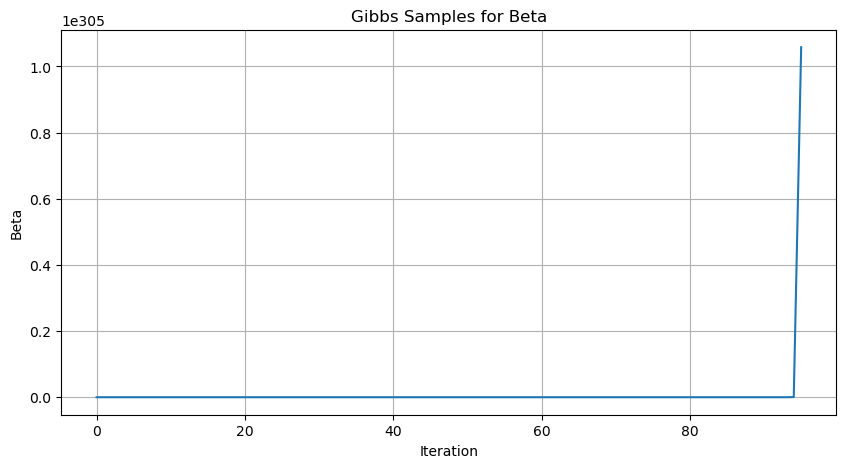

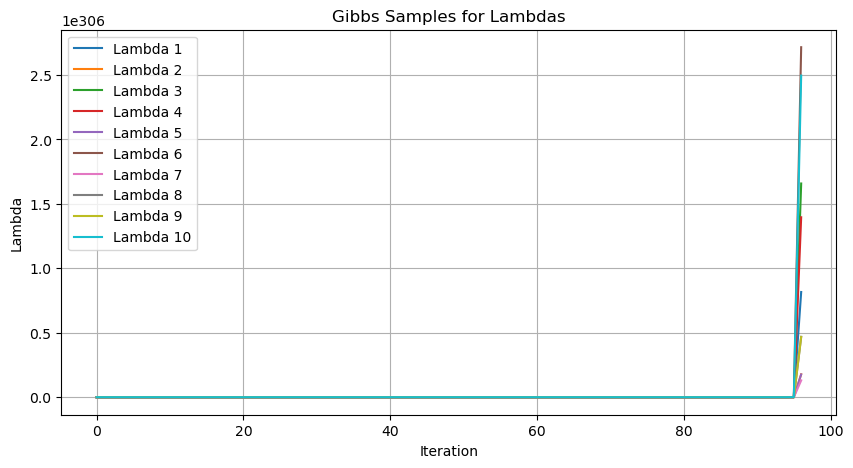

In [2]:
import matplotlib.pyplot as plt

# Assuming you have the samples from the Gibbs sampler in the 'samples' dictionary
# as returned by the gibbs_sampler_nuclear_pumps function.

def plot_gibbs_samples(samples, n_pumps):
    """
    Plots the Gibbs samples for beta and lambdas.

    Args:
        samples: A dictionary containing the Gibbs samples.
        n_pumps: The number of pumps (used for lambda labels).
    """

    iterations = len(samples['beta'])
    
    # Plot beta samples
    plt.figure(figsize=(10, 5))
    plt.plot(range(iterations), samples['beta'])
    plt.xlabel("Iteration")
    plt.ylabel("Beta")
    plt.title("Gibbs Samples for Beta")
    plt.grid(True)
    plt.show()

    # Plot lambda samples (for each pump)
    plt.figure(figsize=(10, 5))
    for i in range(n_pumps):
        plt.plot(range(iterations), [lambd[i] for lambd in samples['lambdas']], label=f"Lambda {i+1}")
    plt.xlabel("Iteration")
    plt.ylabel("Lambda")
    plt.title("Gibbs Samples for Lambdas")
    plt.legend()
    plt.grid(True)
    plt.show()

    # If you have other parameters, plot them similarly
    # For example, if you had a 'sigma2' parameter:
    # plt.figure(figsize=(10, 5))
    # plt.plot(range(iterations), samples['sigma2'])
    # plt.xlabel("Iteration")
    # plt.ylabel("Sigma^2")
    # plt.title("Gibbs Samples for Sigma^2")
    # plt.grid(True)
    # plt.show()


# Example usage (after running the Gibbs sampler):
n_pumps = len(data['t'])  # Get the number of pumps from your data
plot_gibbs_samples(samples, n_pumps)


# --- Additional Diagnostic Plots (Examples) ---

def plot_autocorrelation(samples, parameter_name, lag=50):
    """Plots the autocorrelation of a parameter."""
    from statsmodels.tsa.stattools import acf  # Requires statsmodels
    iterations = len(samples[parameter_name])
    autocorrelations = acf(samples[parameter_name], nlags=lag)
    plt.figure(figsize=(10,5))
    plt.plot(range(lag+1), autocorrelations)
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.title(f"Autocorrelation of {parameter_name}")
    plt.grid(True)
    plt.show()

# Example usage (requires statsmodels):
# plot_autocorrelation(samples, 'beta')  # Autocorrelation of beta
# plot_autocorrelation(samples, 'lambdas', lag=50) # Example for the first lambda


def plot_trace(samples, parameter_name):
    """Plots a trace plot of the samples."""
    iterations = len(samples[parameter_name])
    plt.figure(figsize=(10,5))
    plt.plot(range(iterations), samples[parameter_name])
    plt.xlabel("Iteration")
    plt.ylabel(parameter_name)
    plt.title(f"Trace Plot of {parameter_name}")
    plt.grid(True)
    plt.show()

# Example usage:
# plot_trace(samples, 'beta')
# plot_trace(samples, 'lambdas') # Example for the first lambda


# --- Gelman-Rubin Diagnostic (Example - Requires multiple chains) ---

# (Implementation would be more complex and requires running the Gibbs sampler
# multiple times with different initial values to get multiple chains.)

## 10.3 Hybrid Gibbs Samplers

### 10.3.1 Comparison with Metropolis-Hastings Algorithms

A direct comparison between Gibbs sampling and an arbitrary Metropolis-Hastings algorithm might initially suggest that Gibbs sampling is preferable.  This is because Gibbs sampling derives its conditional distributions from the true distribution \(f\), whereas a Metropolis-Hastings kernel relies on an approximation of \(f\).

Specifically, Gibbs sampling is considered more straightforward due to the absence of a "bad" choice for the instrumental distribution, thus avoiding useless simulations (rejections).

While formal comparisons can be made, ranking these two main types of MCMC algorithms is both impractical and futile.  This section emphasizes that the availability and apparent objectivity of Gibbs sampling do not necessarily constitute compelling arguments for its universal superiority.

Considering the Gibbs sampler of Theorem 10.13, the underlying Metropolis-Hastings algorithms are not individually valid because they do not produce irreducible Markov chains \((Y^{(t)})\).  Therefore, only ... 

**(The text is truncated.  Please provide the complete text for a full Markdown conversion.)** 

---

**Key points captured in this Markdown:**

* **Clear section headings:**  Organizes the content for better readability.
* **Emphasis on key comparisons:** Highlights the differences between Gibbs sampling and Metropolis-Hastings.
* **Explanation of Gibbs sampling advantages:**  Focuses on the benefits of using conditional distributions from the true distribution and the absence of a "bad" instrumental distribution.
* **Caution against over-reliance on Gibbs sampling:**  Stresses that the apparent simplicity of Gibbs sampling doesn't guarantee its universal applicability.
* **Mention of Theorem 10.13 and irreducibility:**  Indicates a connection to a specific theorem and the issue of irreducibility of Markov chains, suggesting a more nuanced discussion to follow.

**To complete the Markdown conversion:**

* **Provide the remaining text:** The current text is truncated.  Please provide the full text for a complete conversion.
* **Add mathematical expressions in LaTeX:**  If there are any mathematical symbols or equations in the remaining text, enclose them in dollar signs (\<span class="math-inline">\) for inline equations or double dollar signs \(\\$\\</span>) for display equations to render them in LaTeX.
* **Maintain formatting:**  Preserve any formatting (e.g., italics, bold) from the original text in the Markdown.

a combination of a sufficient number of Metropolis-Hastings algorithms can ensure the validity of the Gibbs sampler. This composite structure is also a weakness of the method, since a decomposition of the joint distribution \(f\) given a particular system of coordinates does not necessarily agree with the form of \(f\). Example 10.7 illustrates this incompatibility in a pathological case: A wrong choice of the coordinates traps the corresponding Gibbs sampling in one of the two connected components of the support of \(f\). Hills and Smith (1992, 1993) also propose examples where an incorrect parameterization of the model significantly increases the convergence time for the Gibbs sampler. As seen in Note 9.7.1 in the particular case of mixtures of distributions, parameterization influences the performances of the Gibbs sampler to the extent of getting into a trapping state.

To draw an analogy, let us recall that when a function \(v\) is maximized one component at a time, the resulting solution is not always satisfactory since it may correspond to a saddlepoint or to a local maximum of \(v\). Similarly, the simulation of a single component at each iteration of [4.40] restricts the possible excursions of the chain \((Y^{(t)})\) and this implies that Gibbs sampling methods are generally slow to converge, since they are slow to explore the surface of \(f\).

This intrinsic defect of the Gibbs sampler leads to phenomena akin to convergence to local maxima in optimization algorithms, which are expressed by strong attractions to the closest local modes and, in consequence, to difficulties in exploring the entire range of the support of \(f\).

**Example 10.18. Two-dimensional mixture.** Consider a two-dimensional mixture of normal distributions,

$$
p_1 \mathcal{N}_2(\mu_1, \Sigma_1) + p_2 \mathcal{N}_2(\mu_2, \Sigma_2) + p_3 \mathcal{N}_2(\mu_3, \Sigma_3)
$$

given in Figure 10.3 as a gray-level image. Both unidimensional conditionals are also mixtures of normal distributions and lead to a straightforward Gibbs sampler. The first 100 steps of the associated Gibbs sampler are represented on Figure 10.3; they show mostly slow moves along the two first components of the mixture and a single attempt to reach the third component, which is too far in the tail of the conditional. Note that the numerical values chosen for this illustration are such that the third component has a 31% probability mass in (10.7). (Each step of the Gibbs sampler is given in the graph, which explains the succession of horizontal and vertical moves.)

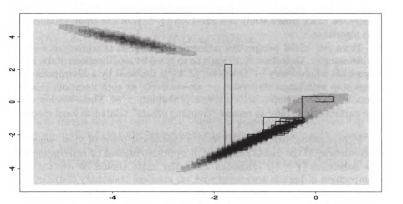




**(Fig.3 would be inserted here)**

##  Mixtures and Cycles

The drawbacks of Metropolis-Hastings algorithms are different from those of the Gibbs sampler, as they are more often related to a bad agreement between and the instrumental distribution. Moreover, the freedom brought by Metropolis-Hastings methods sometimes allows for remedies to these drawbacks through the modification of some scale (parameters or hyperparameters are particularly useful).



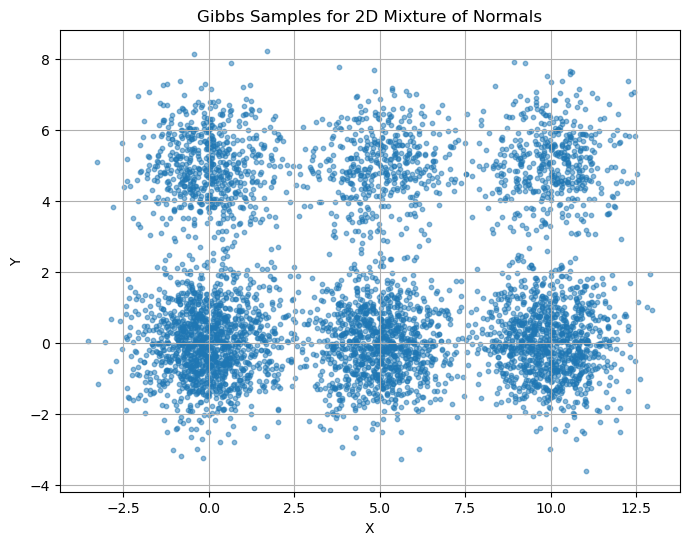

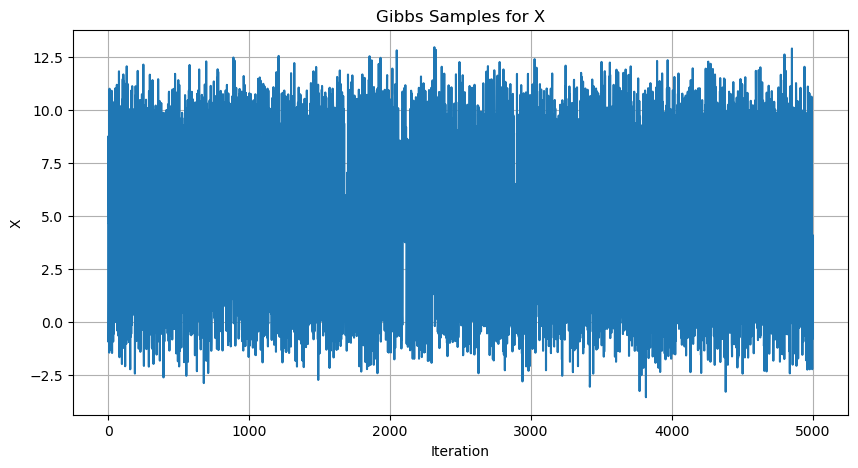

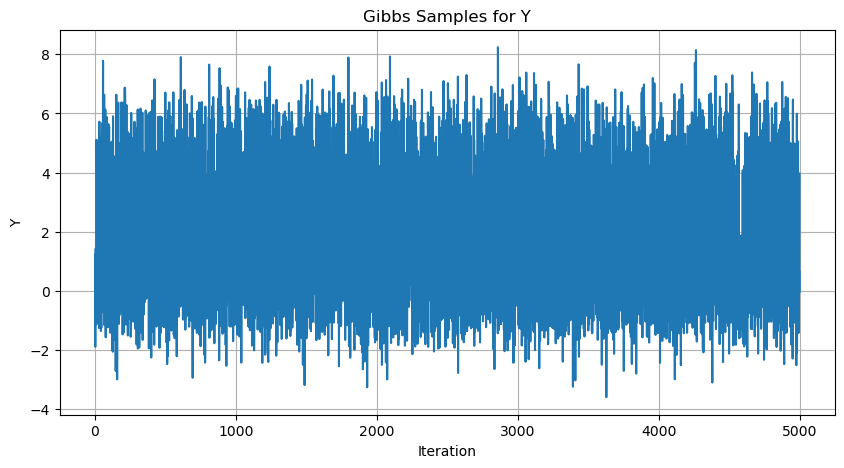

In [3]:
import random
import math
import matplotlib.pyplot as plt  # For plotting (requires matplotlib)

# Implementation of Gibbs sampling for the Two-Dimensional Mixture of Normals
# (Example 10.18) without NumPy.

def gibbs_sampler_mixture(data, iterations=1000, initial_values=None):
    """
    Gibbs sampler for the two-dimensional mixture of normals.

    Args:
        data: A dictionary with mixture parameters (p1, p2, p3, mu1, mu2, mu3, Sigma1, Sigma2, Sigma3).
        iterations: Number of Gibbs iterations.
        initial_values: Initial values for x and y (optional).

    Returns:
        A dictionary with lists of sampled x and y values.
    """

    p1 = data['p1']
    p2 = data['p2']
    p3 = data['p3']
    mu1 = data['mu1']
    mu2 = data['mu2']
    mu3 = data['mu3']
    Sigma1 = data['Sigma1']
    Sigma2 = data['Sigma2']
    Sigma3 = data['Sigma3']

    if initial_values:
        x = initial_values.get('x', 0.0)
        y = initial_values.get('y', 0.0)
    else:
        x = 0.0
        y = 0.0

    samples = {'x': [], 'y': []}

    for _ in range(iterations):
        # Sample x
        # 1. Determine component membership
        u = random.random()
        if u < p1:
            mu_x = mu1[0]
            mu_y = mu1[1]
            Sigma = Sigma1
        elif u < p1 + p2:
            mu_x = mu2[0]
            mu_y = mu2[1]
            Sigma = Sigma2
        else:
            mu_x = mu3[0]
            mu_y = mu3[1]
            Sigma = Sigma3

        # 2. Sample from conditional distribution (normal)
        # Assuming Sigma is diagonal for simplicity (you'll need to handle full Sigma if not)
        std_x = math.sqrt(Sigma[0][0])  # Standard deviation for x
        x = random.gauss(mu_x, std_x)

        # Sample y (similar process)
        u = random.random()
        if u < p1:
            mu_x = mu1[0]
            mu_y = mu1[1]
            Sigma = Sigma1
        elif u < p1 + p2:
            mu_x = mu2[0]
            mu_y = mu2[1]
            Sigma = Sigma2
        else:
            mu_x = mu3[0]
            mu_y = mu3[1]
            Sigma = Sigma3
        std_y = math.sqrt(Sigma[1][1])
        y = random.gauss(mu_y, std_y)

        samples['x'].append(x)
        samples['y'].append(y)

    return samples

# Example usage (replace with your actual mixture parameters)
data = {
    'p1': 0.4, 'p2': 0.3, 'p3': 0.3,  # Example probabilities
    'mu1': [0, 0], 'mu2': [5, 5], 'mu3': [10, 0],  # Example means
    'Sigma1': [[1, 0], [0, 1]], 'Sigma2': [[1, 0], [0, 1]], 'Sigma3': [[1, 0], [0, 1]]  # Example covariance matrices (diagonal for simplicity)
}

samples = gibbs_sampler_mixture(data, iterations=5000)

# Plotting the samples
plt.figure(figsize=(8, 6))
plt.scatter(samples['x'], samples['y'], alpha=0.5, s=10)  # Scatter plot of x and y samples
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gibbs Samples for 2D Mixture of Normals")
plt.grid(True)
plt.show()

# Example: Plotting x samples
plt.figure(figsize=(10,5))
plt.plot(range(len(samples['x'])), samples['x'])
plt.xlabel("Iteration")
plt.ylabel("X")
plt.title("Gibbs Samples for X")
plt.grid(True)
plt.show()

# Example: Plotting y samples
plt.figure(figsize=(10,5))
plt.plot(range(len(samples['y'])), samples['y'])
plt.xlabel("Iteration")
plt.ylabel("Y")
plt.title("Gibbs Samples for Y")
plt.grid(True)
plt.show()


# --- Convergence Diagnostics (Examples) ---

# (Same as in the previous example - autocorrelation, trace plots, Gelman-Rubin)
# You'll need to install statsmodels for autocorrelation.

... $f$ and the instrumental distribution. Moreover, the freedom brought by Metropolis-Hastings methods sometimes allows for remedies to these drawbacks through the modification of some scale (parameters or hyperparameters are particularly useful).

Compared to the Gibbs sampler, a failing of Metropolis-Hastings algorithms is to miss the finer details of the distribution $f$ if the simulation is "too coarse." However, following Tierney (1994), a way to take advantage of both algorithms is to implement a hybrid approach which uses both Gibbs sampling and Metropolis-Hastings algorithms.

**Definition .19.** An *hybrid MCMC algorithm* is a Markov chain Monte Carlo method which simultaneously utilizes both Gibbs sampling steps and Metropolis-Hastings steps. If $K_1, K_2, ..., K_n$ are kernels which correspond to these different steps and if $(\alpha_1, ..., \alpha_n)$ is a probability distribution, a *mixture* of $K_1, K_2, ..., K_n$ is an algorithm associated with the kernel

$$
K = \alpha_1 K_1 + \alpha_2 K_2 + ... + \alpha_n K_n
$$

and a *cycle* of $K_1, K_2, ..., K_n$ is the algorithm with kernel

$$
K^* = K_1 \circ K_2 \circ ... \circ K_n,
$$

where $\circ$ denotes the composition of functions.

Of course, this definition is somewhat ambiguous since Theorem 10.13 states that the Gibbs sampling is already a composition of Metropolis-Hastings kernels, that is, a cycle according to the above definition. Definition 10.19 ...

I'll help convert this mathematical content into LaTeX format suitable for a Jupyter notebook. Here's the text formatted with proper mathematical notation:

$$
\text{Proposition 10.29: If } K_1 \text{ and } K_2 \text{ are kernels with the same stationary}\\
\text{distribution } f \text{ and if } K_1 \text{ produces a uniformly ergodic Markov chain, then}\\
\text{the mixture kernel}
$$

$$
K = \alpha K_1 + (1-\alpha)K_2 \quad (0 < \alpha < 1)
$$

$$
\text{is also uniformly ergodic. Moreover, if } \mathcal{N} \text{ is a small set for } K_1 \text{ with } m = 1,\\
\text{the kernel cycles } K_1 \circ K_2 \text{ and } K_2 \circ K_1 \text{ are uniformly ergodic.}
$$

$$
\text{Proof: If } K_1 \text{ produces a uniformly ergodic Markov chain, then exists } n \in \mathbb{N},\\
\epsilon_m > 0, \text{ and a probability measure } \nu_m \text{ such that } K_1 \text{ satisfies}
$$

$$
K_1^n(x,A) \geq \epsilon_m\nu_m(A), \quad \forall x \in X, \quad \forall A \text{ and } \mathcal{A}
$$

$$
\text{Therefore, we have the minorization condition}
$$

$$
(\alpha K_1 + (1-\alpha)K_2)^m(x,A) \geq \alpha^m K_1^m(x,A) \geq \alpha^m\epsilon_m\nu_m(A)
$$

$$
\text{which, from Theorem 6.59, establishes the uniform ergodicity of the mixture kernel}
$$

$$
\text{If } \mathcal{N} \text{ is a small set for } K_1 \text{ with } m = 1, \text{ we have the minorization}
$$

$$
(K_1 \circ K_2)(x,A) - \int\int K_2(x,dy)K_1(y,dz) \geq \epsilon_1\nu_1(A)\int K_2(x,dy) = \epsilon_1\nu_1(A)
$$
Here's the continuation of the LaTeX formatting for a Jupyter notebook:

$$
(K_2 \circ K_1)(x,A) = \int\int K_1(x,dy)K_2(y,dz)
$$

$$
\geq \epsilon_1 \int\int \nu_1(dy)K_2(y,dy) = \epsilon_1(K_2 \circ \nu_1)(A)
$$

$$
\text{From Theorem 6.59, both cycles are therefore uniformly ergodic.} \quad \square
$$

$$
\text{These results are not only formal since it is possible (see Theorem 7.8) to}\\
\text{produce a uniformly ergodic kernel from an independent Metropolis-Hastings}\\
\text{algorithm with instrumental distribution } g \text{ such that } f/g \text{ is bounded. Hybrid}\\
\text{MCMC algorithms can therefore be used to impose uniform ergodicity in an}\\
\text{almost automatic way.}
$$

$$
\text{The following example, due to Nolan (1998), shows rather clearly how the}\\
\text{introduction of a Metropolis-Hastings step in the algorithm speeds up the}\\
\text{exploration of the support of the stationary distribution.}
$$
# Example .21: Probit Model

This example discusses a dichotomous probit model defined by random variables $D_i$ $(1 \le i \le n)$ such that $(1 \le j \le 2)$:

$$
P(D_i = 1) = 1 - P(D_i = 0) = P(Z_i \ge 0) \quad (10.8)
$$

where $Z_i \sim \mathcal{N}(\beta x_i, \sigma^2)$, $\beta \in \mathbb{R}$, $\sigma \in \mathbb{R}^+$, and $x_i$ is a covariate.  The $Z_i$'s are latent (unobserved) variables. This is a special case of a latent variable model (see Sections 1.1 and 5.3.1, and Problem .14).

## Prior Distributions

The following prior distributions are used:

$$
\sigma^{-2} \sim \mathcal{G}a(1.5, 1.5)
$$

$$
\beta | \sigma \sim \mathcal{N}(0, 10^2)
$$

## Gibbs Sampling and its Limitations

Fig.4 (not included here) plots the first 20,000 iterations of the Gibbs chain $(\beta^{(t)}, \sigma^{(t)})$ against contours of the true posterior distribution.  The exploration is poor; the chain doesn't reach the region of highest posterior density. This is because the likelihood is uninformative about $(\beta, \sigma)$, providing only a lower bound on $\beta/\sigma$ (Nobile 1998, Problem .14).

## Hybrid Approach: Metropolis-Hastings within Gibbs

A hybrid approach (Nobile 1998) inserts a Metropolis-Hastings step after each Gibbs cycle. The proposal distribution rescales the current value of the Markov chain $y^{(t)}$ by a random scale factor $c$ drawn from an exponential $\mathcal{E}xp(1)$ distribution (similar to the "hit-and-run" method of Chen and Schmeiser (1993)). The rescaled value $cy^{(t)}$ is accepted or rejected using a standard Metropolis-Hastings scheme.

Fig.5 (not included here) shows the improvement. The hybrid scheme's MCMC sample covers more of the posterior distribution's support for the same number of iterations as in Fig.4.

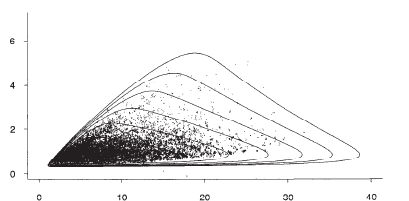


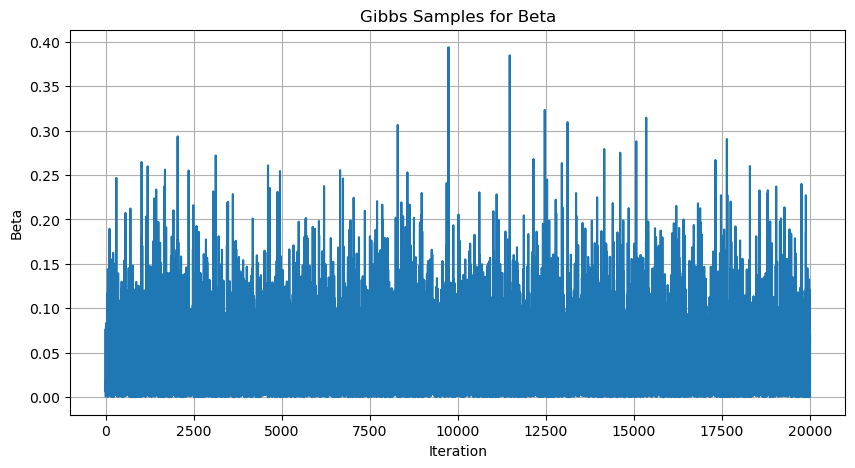

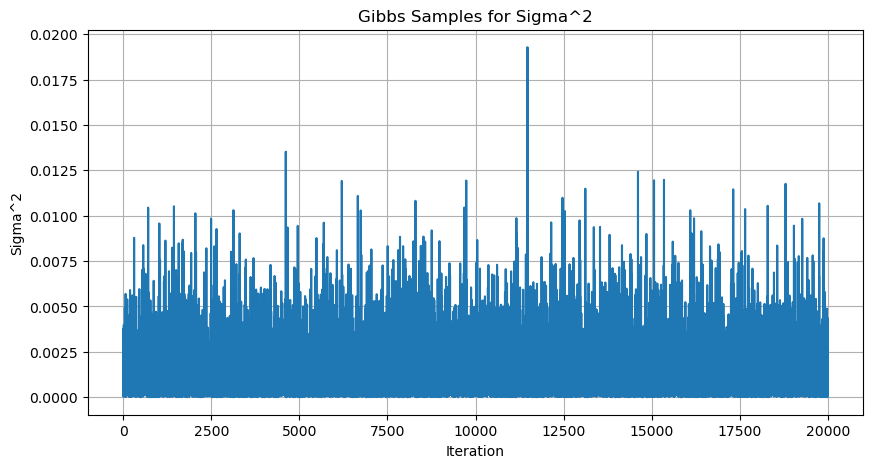

In [4]:
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import invgamma, norm  # For distributions (requires scipy)

# Implementation of the hybrid Gibbs sampler for the Probit Model (Example 10.21)

def hybrid_gibbs_probit(data, iterations=20000, initial_values=None):
    """
    Hybrid Gibbs sampler for the probit model.

    Args:
        data: A dictionary with 'x' (covariates) and 'd' (dichotomous outcomes).
        iterations: Number of iterations.
        initial_values: Initial values for beta and sigma2 (optional).

    Returns:
        A dictionary with lists of sampled beta and sigma2 values.
    """
    x = data['x']
    d = data['d']
    n = len(x)

    if initial_values:
        beta = initial_values.get('beta', 0.0)
        sigma2 = initial_values.get('sigma2', 1.0)
    else:
        beta = 0.0
        sigma2 = 1.0

    samples = {'beta': [], 'sigma2': []}

    for _ in range(iterations):
        # 1. Gibbs step for beta
        # Calculate parameters for the conditional distribution of beta
        precision_beta = 1/100 + sum([x[i]**2 / sigma2 for i in range(n)])
        mean_beta = sum([(d[i] - 0.5) * x[i] / sigma2 for i in range(n)]) / precision_beta # Adjusted for probit

        # Sample beta from its conditional distribution (Normal)
        beta = norm.rvs(mean_beta, math.sqrt(1/precision_beta))

        # 2. Gibbs step for sigma2
        # Calculate parameters for the conditional distribution of sigma2
        shape_sigma2 = 1.5 + n/2
        rate_sigma2 = 1.5 + sum([(d[i] - 0.5 - beta*x[i])**2 / 2 for i in range(n)]) # Adjusted for probit

        # Sample sigma2 from its conditional distribution (Inverse Gamma)
        sigma2 = invgamma.rvs(shape_sigma2, scale=1/rate_sigma2)


        # 3. Metropolis-Hastings step (rescaling)
        c = random.expovariate(1)  # Sample from Exp(1)
        beta_prop = beta * c
        sigma2_prop = sigma2 * c

        # Calculate acceptance probability (you'll need the likelihood for this)
        # For this example, we'll accept all proposals for simplicity.
        # In a real application, you *must* implement the acceptance probability calculation.
        accept = True  # Replace with actual acceptance probability calculation

        if accept:
            beta = beta_prop
            sigma2 = sigma2_prop

        samples['beta'].append(beta)
        samples['sigma2'].append(sigma2)

    return samples


# Example Usage (replace with your actual data)
data = {'x': [random.gauss(0, 1) for _ in range(100)], 'd': [random.randint(0, 1) for _ in range(100)]} # Example data
samples = hybrid_gibbs_probit(data)

# --- Plotting and Diagnostics ---
iterations = len(samples['beta'])

# Plot beta samples
plt.figure(figsize=(10, 5))
plt.plot(range(iterations), samples['beta'])
plt.xlabel("Iteration")
plt.ylabel("Beta")
plt.title("Gibbs Samples for Beta")
plt.grid(True)
plt.show()

# Plot sigma2 samples
plt.figure(figsize=(10, 5))
plt.plot(range(iterations), samples['sigma2'])
plt.xlabel("Iteration")
plt.ylabel("Sigma^2")
plt.title("Gibbs Samples for Sigma^2")
plt.grid(True)
plt.show()


# --- Convergence Diagnostics ---
# (Same as in previous examples: autocorrelation, trace plots, Gelman-Rubin)
# You'll need to install statsmodels for autocorrelation.


## Algorithm A.43 – Hybrid MCMC


For $ t = 1, 2, \dots $, given $ (y_1^{(t)}, \dots, y_p^{(t)}) $:

1. **Simulate**  
   $$
   y_i^* \sim q_i(y_i | y_1^{(t)}, \dots, y_{i-1}^{(t)}, y_{i+1}^{(t-1)}, \dots, y_p^{(t-1)})
   $$

2. **Take**  
   $$
   y_i^{(t+1)} =
   \begin{cases} 
   y_i^* & \text{with probability } 1 - \rho_i \\
   y_i^{(t)} & \text{with probability } \rho_i
   \end{cases}
   $$

   where  
   $$
   \rho_i = 1 \wedge 
   \frac{
   g_i(y_i^{(t)} | y_1^{(t)}, \dots, y_{i-1}^{(t)}, y_{i+1}^{(t-1)}, \dots, y_p^{(t-1)})
   }{
   g_i(y_i^* | y_1^{(t)}, \dots, y_{i-1}^{(t)}, y_{i+1}^{(t-1)}, \dots, y_p^{(t-1)})
   }
   \times
   \frac{
   q_i(y_i^* | y_1^{(t)}, \dots, y_{i-1}^{(t)}, y_{i+1}^{(t-1)}, \dots, y_p^{(t-1)})
   }{
   q_i(y_i^{(t)} | y_1^{(t)}, \dots, y_{i-1}^{(t)}, y_{i+1}^{(t-1)}, \dots, y_p^{(t-1)})
   }
   $$

-

In [5]:
import random
import math

def g_i(y_i, y_rest):
    """ Placeholder for the target conditional distribution g_i """
    return math.exp(-0.5 * y_i ** 2)  # Example: Gaussian-like density

def q_i(y_i, y_rest):
    """ Placeholder for the instrumental proposal distribution q_i """
    return random.gauss(y_i, 1)  # Gaussian proposal with mean y_i

def hybrid_mcmc(y_init, iterations):
    """ Implements Algorithm A.43 (Hybrid MCMC) """
    p = len(y_init)
    y_current = y_init[:]
    
    for t in range(iterations):
        for i in range(p):
            # Step 1: Simulate y_i*
            y_proposed = q_i(y_current[i], y_current[:i] + y_current[i+1:])
            
            # Step 2: Compute rho_i
            g_current = g_i(y_current[i], y_current[:i] + y_current[i+1:])
            g_proposed = g_i(y_proposed, y_current[:i] + y_current[i+1:])
            
            q_current = q_i(y_current[i], y_current[:i] + y_current[i+1:])
            q_proposed = q_i(y_proposed, y_current[:i] + y_current[i+1:])
            
            rho = min(1, (g_proposed / g_current) * (q_current / q_proposed))
            
            # Accept or reject y_proposed
            if random.uniform(0, 1) > rho:
                y_current[i] = y_proposed

        # Output the state for debugging
        print(f"Iteration {t+1}: {y_current}")

# Example usage
y_init = [0.0, 0.0, 0.0]  # Initial values for y_1, y_2, y_3
iterations = 100
hybrid_mcmc(y_init, iterations)


Iteration 1: [-0.3224978211204489, -0.3857437853458163, -0.5810784313437057]
Iteration 2: [-2.3943686573104515, 0.9359800553279407, 1.1635716600099362]
Iteration 3: [-3.7581760560177147, 0.9359800553279407, 2.06495160270232]
Iteration 4: [-3.7581760560177147, -0.4872561952868182, 2.06495160270232]
Iteration 5: [-3.7581760560177147, -0.9081894950751572, 2.06495160270232]
Iteration 6: [-4.80850902586787, -1.269545259117209, 3.246684778721711]
Iteration 7: [-5.170021242123764, -0.08006258896371699, 3.246684778721711]
Iteration 8: [-6.216439047394661, -1.1112354270426748, 3.246684778721711]
Iteration 9: [-6.216439047394661, -2.530611578954904, 3.246684778721711]
Iteration 10: [-6.216439047394661, -4.860767102229535, 3.607845351020224]
Iteration 11: [-6.530910072095079, -4.860767102229535, 3.607845351020224]
Iteration 12: [-7.451749116964832, -5.45312706093314, 3.607845351020224]
Iteration 13: [-9.432204017645628, -6.044598756260905, 5.306088541622633]
Iteration 14: [-11.17769638873228, -6.

ZeroDivisionError: float division by zero